<a href="https://colab.research.google.com/github/gadelhadev/Dados_Airbnb_Dallas/blob/main/Dados_do_Airbnb(Dallas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Análise dos Dados do Airbnb - *Dallas*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


**Neste *notebook*, iremos analisar os dados referentes à cidade Dallas, e ver quais insights podem ser extraídos a partir de dados brutos.**

### Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Dallas (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/united-states/tx/dallas/2022-12-06/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizamos [aqui](https://drive.google.com/file/d/1oRsFg0iJraowwPMKXymC0murQStqrEe_/view?usp=sharing) o conjunto que utilizamos, para que você sempre consiga utilizar esse material.

Com isso em mente, vamos ao projeto.

In [1]:
# Importar pacotes necessários para a análise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Importar o arquivo listings.csv para um DataFrame.
df = pd.read_csv("http://data.insideairbnb.com/united-states/tx/dallas/2022-12-06/visualisations/listings.csv")

In [3]:
# Excluindo colunas irrelevantes para a análise.
df.drop(["neighbourhood_group","license", "number_of_reviews_ltm"],axis = 1, inplace = True)

In [4]:
# Renomeando o nome das colunas para melhor leitura e entendimento.
df.rename(columns={'name': 'nome', 'host_id': 'id_proprietario', 'host_name': 'nome_proprietario',
                   'neighbourhood': 'bairro', 'room_type': 'tipo_quarto', 'price': 'preco', 'minimum_nights': 'minimo_noites',
                   'number_of_reviews': 'numero_reviews', 'last_review': 'ultimo_review', 'reviews_per_month': 'reviews_mes',
                   'calculated_host_listings_count': 'mesmo_proprietario', 'availability_365': 'disponibilidade_ano'}, inplace=True)

### Análise dos Dados


**Dicionário das variáveis**

* `id` - Número de id gerado para identificar o imóvel
* `nome` - Nome da propriedade anunciada
* `id_proprietario` - Número de id do proprietário
* `nome_proprietario` - Nome do proprietário
* `bairro` - Nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `tipo_quarto` - tipo de quarto que é oferecido
* `preco` - preço para alugar o imóvel
* `minimo_noites` - quantidade mínima de noites para reservar
* `numero_reviews` - número de reviews que a propriedade possui
* `ultimo_review` - data do último review
* `reviews_mes` - quantidade de reviews por mês
* `mesmo_proprietario` - quantidade de imóveis do mesmo proprietário
* `disponibilidade_ano` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# Verificar as 5 primeiras entradas.
df.head()

,id,nome,id_proprietario,nome_proprietario,bairro,latitude,longitude,tipo_quarto,preco,minimo_noites,numero_reviews,ultimo_review,reviews_mes,mesmo_proprietario,disponibilidade_ano
0,590919120520645193,"Spacious, liveable, apartment complex.",450628013,Vivacia,District 3,32.711750,-96.87456,Entire home/apt,258,1,0,NaN,NaN,1,365
1,724469148798074768,Gadio’s Getaway in Dallas,217651977,Cutie,District 4,32.710460,-96.81766,Private room,160,1,1,2022-10-23,0.67,5,358
2,716914096315109767,Lovely 1 Bedroom Rental Unit with free Parking,463228509,Kayode,District 3,32.665070,-96.94093,Entire home/apt,85,1,4,2022-11-12,2.35,1,365
3,682798437855353056,Beautiful Spacious Condo 10 min from Downtown,464917277,Tori,District 1,32.724170,-96.83011,Entire home/apt,115,1,0,NaN,NaN,1,365
4,672539562939046570,You’re beautiful home away from home…Staycation,454845204,Joyale,District 8,32.658849,-96.76540,Entire home/apt,255,3,1,2022-07-24,0.22,1,364


###Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [6]:
# Identificar o volume de dados do DataFrame.
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))
# Verificando o tipo de variável das colunas.
df.dtypes

Entradas:	 5761
Variáveis:	 15



id                       int64
nome                    object
id_proprietario          int64
nome_proprietario       object
bairro                  object
latitude               float64
longitude              float64
tipo_quarto             object
preco                    int64
minimo_noites            int64
numero_reviews           int64
ultimo_review           object
reviews_mes            float64
mesmo_proprietario       int64
disponibilidade_ano      int64
dtype: object

###Qual a porcentagem de valores ausentes no *dataset*?
A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.
 
* As variáveis `reviews_mes` e `ultimo_review` possuem valores nulos próximos a 19%.

In [7]:
# Ordenar em ordem decrescente as variáveis por seus valores ausentes.
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100

ultimo_review          18.937684
reviews_mes            18.937684
id                      0.000000
nome                    0.000000
id_proprietario         0.000000
nome_proprietario       0.000000
bairro                  0.000000
latitude                0.000000
longitude               0.000000
tipo_quarto             0.000000
preco                   0.000000
minimo_noites           0.000000
numero_reviews          0.000000
mesmo_proprietario      0.000000
disponibilidade_ano     0.000000
dtype: float64

###Qual o tipo de distribuição das variáveis?

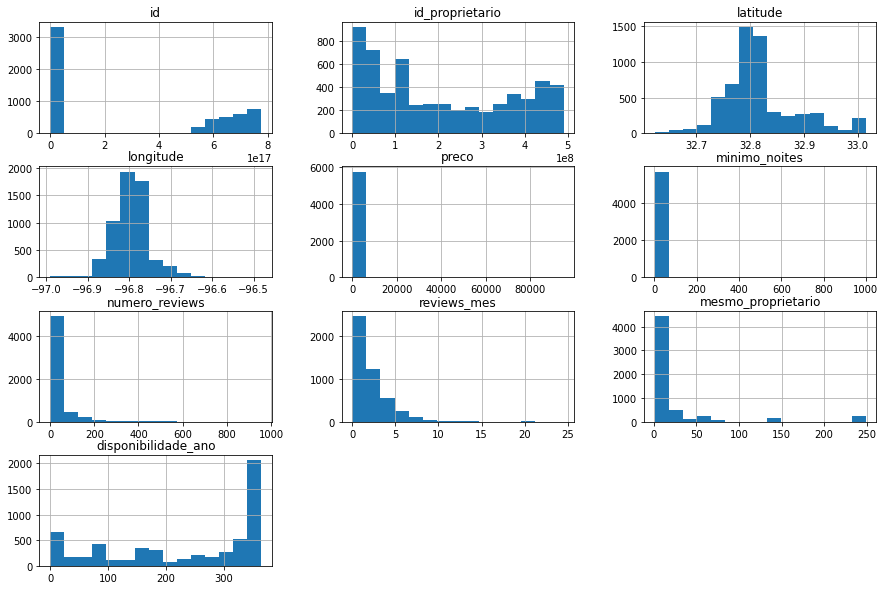

In [8]:
# Plotar o histograma das variáveis numéricas.
df.hist(bins=15, figsize=(15,10));

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `preco` e `minimo_noites`

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [26]:
# Ver o resumo estatístico das variáveis numéricas.
df[['preco', 'minimo_noites']].describe()

,preco,minimo_noites
count,5761.000000,5761.000000
mean,190.690679,7.844645
std,1553.248751,21.841085
min,10.000000,1.000000
25%,81.000000,1.000000
50%,115.000000,2.000000
75%,178.000000,4.000000
max,95136.000000,1000.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável Preço(`preco`) possui 75% do valor abaixo de 178, porém seu valor máximo é 95136.
* A quantidade mínima de noites (`minimo_noites`) está acima de 365 dias no ano.



###Boxplot para a variável `minimo_noites`


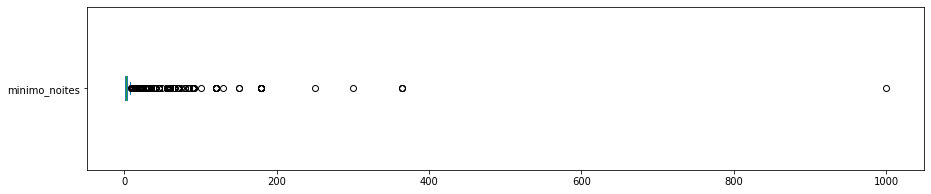

minimo_noites: valores acima de 30:
209 entradas
3.6278%


In [30]:
# Minimo_noites.
df.minimo_noites.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Ver quantidade de valores acima de 30 dias para minimo_noites.
print("minimo_noites: valores acima de 30:")
print("{} entradas".format(len(df[df.minimo_noites > 30])))
print("{:.4f}%".format((len(df[df.minimo_noites > 30]) / df.shape[0])*100))

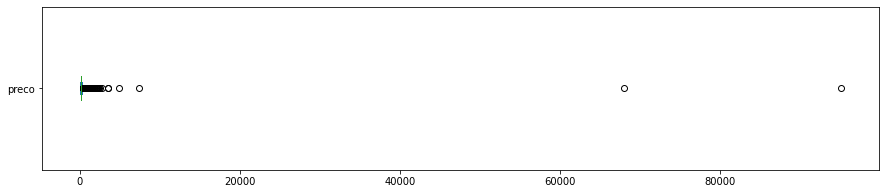


preco: valores acima de 1500
24 entradas
0.4166%


In [31]:
# Preço.
df.preco.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# Ver quantidade de valores acima de 1500 para preco.
print("\npreco: valores acima de 1500")
print("{} entradas".format(len(df[df.preco > 1500])))
print("{:.4f}%".format((len(df[df.preco > 1500]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `minimo_noites` e `preco`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

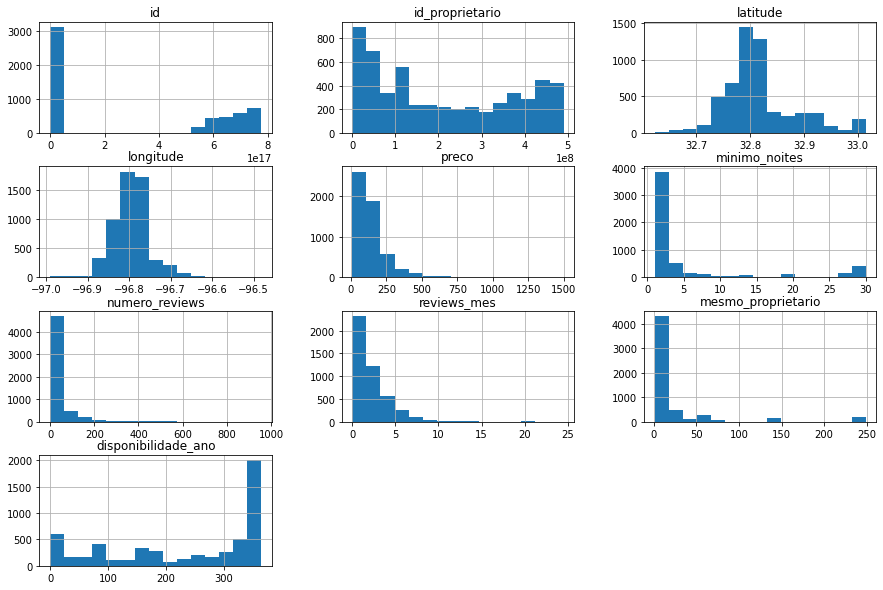

In [32]:
# Remover os *outliers* em um novo DataFrame.
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.preco > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimo_noites > 30].index, axis=0, inplace=True)


# Plotar o histograma para as variáveis numéricas.
df_clean.hist(bins=15, figsize=(15,10));

###Qual a média dos preços de aluguel?

In [33]:
# Ver a média da coluna preco.
df_clean.preco.mean()

154.80271247739603

###Qual a correlação existente entre as variáveis

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [34]:
# Criar uma matriz de correlação.
corr = df_clean[['preco', 'minimo_noites', 'numero_reviews', 'reviews_mes',
    'mesmo_proprietario', 'disponibilidade_ano']].corr()

display(corr)

,preco,minimo_noites,numero_reviews,reviews_mes,mesmo_proprietario,disponibilidade_ano
preco,1.000000,-0.083425,-0.083306,-0.075206,-0.056784,-0.032150
minimo_noites,-0.083425,1.000000,-0.165670,-0.313854,0.228995,-0.014886
numero_reviews,-0.083306,-0.165670,1.000000,0.587781,-0.100005,-0.025326
reviews_mes,-0.075206,-0.313854,0.587781,1.000000,-0.199052,0.060330
mesmo_proprietario,-0.056784,0.228995,-0.100005,-0.199052,1.000000,-0.004077
disponibilidade_ano,-0.032150,-0.014886,-0.025326,0.060330,-0.004077,1.000000


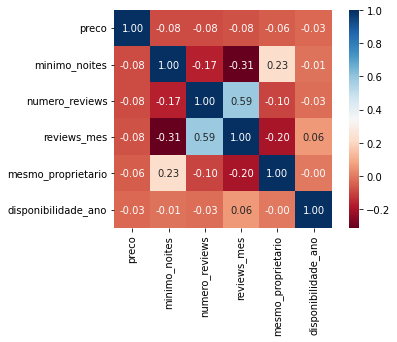

In [15]:
# Gráfico de correlação entre as variáveis.
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

###Qual o tipo de imóvel mais alugado no Airbnb?

In [16]:
# Mostrar a quantidade de cada tipo de imóvel disponível.
#Entire home/apt = Casa inteira/apartamento.
#Private room = Quarto privado
#Shared room = Quartos compartilhadas.


df_clean.tipo_quarto.value_counts()

Entire home/apt    4662
Private room        729
Shared room         139
Name: tipo_quarto, dtype: int64

In [17]:
# Mostrar a porcentagem de cada tipo de imóvel disponível.
df_clean.tipo_quarto.value_counts() / df_clean.shape[0] * 100

Entire home/apt    84.303797
Private room       13.182640
Shared room         2.513562
Name: tipo_quarto, dtype: float64

###Qual a localidade mais cara do dataset?



In [18]:
# Ver preços por bairros, na média.
df_clean.groupby(['bairro']).preco.mean().sort_values(ascending=False)[:10]

bairro
District 6     238.792453
District 13    194.423529
District 11    167.760252
District 4     164.821918
District 14    159.781227
District 9     155.297297
District 8     148.644444
District 2     145.194409
District 3     144.650602
District 1     137.820561
Name: preco, dtype: float64

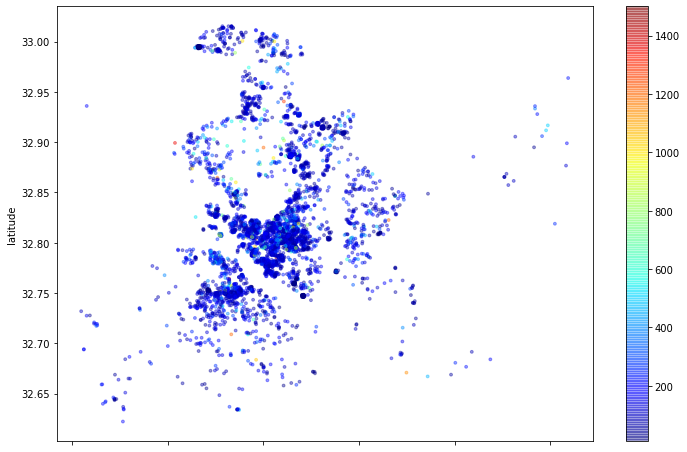

In [19]:
# Plotar os imóveis pela latitude-longitude.
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['preco'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

###Qual é a média do mínimo de noites para aluguel (minimo_noites)?

In [35]:
# Ver a média da coluna `minimo_noites`
df_clean.minimo_noites.mean()

5.474321880650995

In [37]:
df_clean.isnull().sum().sort_values (ascending = False)

ultimo_review          1006
reviews_mes            1006
id                        0
nome                      0
id_proprietario           0
nome_proprietario         0
bairro                    0
latitude                  0
longitude                 0
tipo_quarto               0
preco                     0
minimo_noites             0
numero_reviews            0
mesmo_proprietario        0
disponibilidade_ano       0
dtype: int64

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

As variáveis **ultimo_review** e **review_mes** apresentaram um alto índece de valores ausentes para o dataset.

Casa inteira e apartamento juntas representam 84,3% dos anúncios, com o número de 4662 unidades. 

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.